Iter 200, Cost = 0.187407
Iter 400, Cost = 0.120357
Iter 600, Cost = 0.090619
Iter 800, Cost = 0.073225
Iter 1000, Cost = 0.061654
Iter 1200, Cost = 0.053348
Iter 1400, Cost = 0.047074
Iter 1600, Cost = 0.042157
Iter 1800, Cost = 0.038194
Iter 2000, Cost = 0.034929

Final Parameters (theta):
[1.28369474 5.96055882 4.34206947]

Prediction for Runner (25 km/h, 1 ammo clip)
Survival Probability: 0.9995
Predicted Class: 1 (Survive)


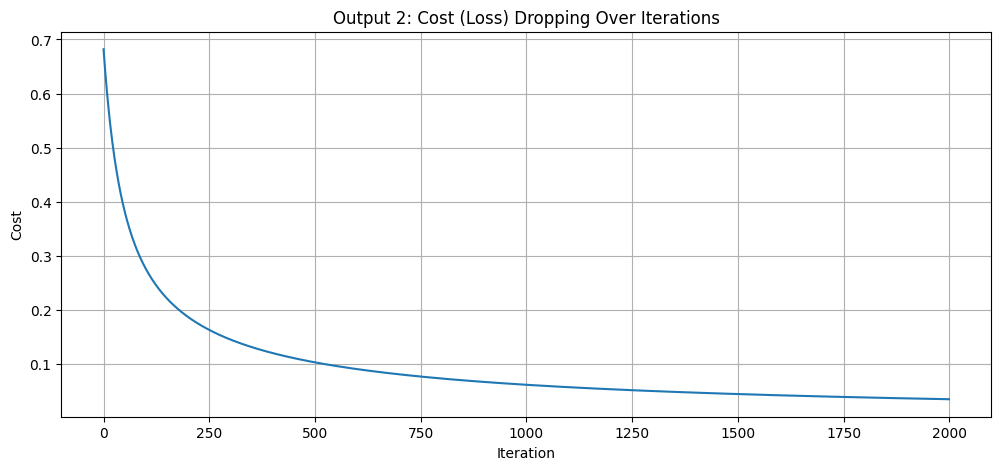

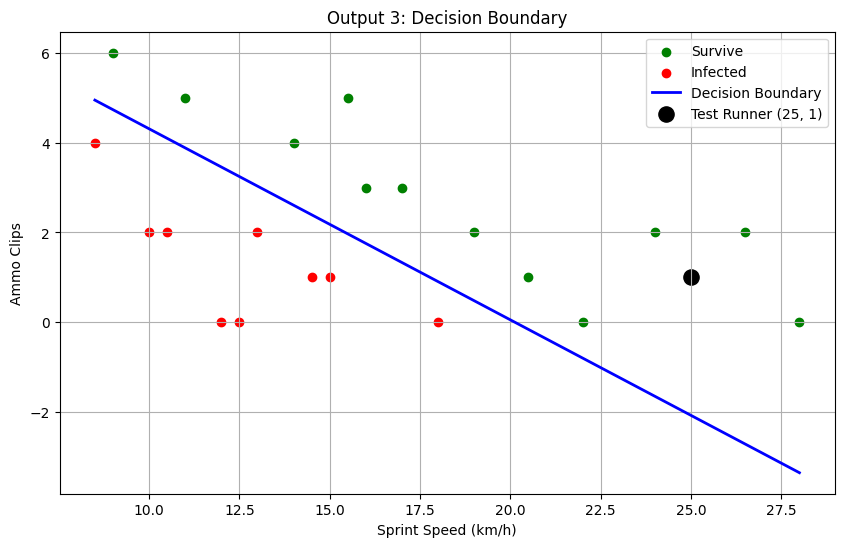

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


url = "https://docs.google.com/spreadsheets/d/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U/export?format=csv"
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8').strip().split("\n")

# Skip header
rows = [row.split(",") for row in data[1:]]

speed = []
ammo = []
label = []

for r in rows:
    speed.append(float(r[0]))
    ammo.append(float(r[1]))
    label.append(float(r[2]))

speed = np.array(speed)
ammo  = np.array(ammo)
y     = np.array(label)

X = np.column_stack((speed, ammo))

mean = np.mean(X, axis=0)
std  = np.std(X, axis=0)

X_norm = (X - mean) / std

m_samples = len(X_norm)

X_b = np.c_[np.ones((m_samples, 1)), X_norm]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    eps = 1e-5
    cost = -(1/m) * (y @ np.log(h + eps) + (1 - y) @ np.log(1 - h + eps))
    return cost

def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta = theta - lr * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if (i+1) % 200 == 0:
            print(f"Iter {i+1}, Cost = {cost:.6f}")

    return theta, cost_history

theta_initial = np.zeros(X_b.shape[1])
learning_rate = 0.1
iterations = 2000

theta_optimal, costs = gradient_descent(X_b, y, theta_initial, learning_rate, iterations)

print("\nFinal Parameters (theta):")
print(theta_optimal)

runner = np.array([25, 1])
runner_norm = (runner - mean) / std
runner_b = np.r_[1, runner_norm]

prob = sigmoid(runner_b @ theta_optimal)
prediction = 1 if prob >= 0.5 else 0

print("\nPrediction for Runner (25 km/h, 1 ammo clip)")
print(f"Survival Probability: {prob:.4f}")
print(f"Predicted Class: {prediction} ({'Survive' if prediction==1 else 'Infected'})")

plt.figure(figsize=(12, 5))
plt.plot(costs)
plt.title("Output 2: Cost (Loss) Dropping Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))

survive = y == 1
infected = y == 0

plt.scatter(speed[survive], ammo[survive], c='green', label="Survive")
plt.scatter(speed[infected], ammo[infected], c='red', label="Infected")

x_vals = np.linspace(min(speed), max(speed), 100)
x_norm = (x_vals - mean[0]) / std[0]

y_norm = -(theta_optimal[0] + theta_optimal[1] * x_norm) / theta_optimal[2]
y_vals = y_norm * std[1] + mean[1]

plt.plot(x_vals, y_vals, 'b-', label="Decision Boundary", linewidth=2)
plt.scatter([25], [1], color='black', s=120, label="Test Runner (25, 1)")

plt.title("Output 3: Decision Boundary")
plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.legend()
plt.grid(True)
plt.show()